In [1]:
#https://stackoverflow.com/questions/47311632/jupyter-how-to-rotate-3d-graph/47311878

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path_file = r"pima-indians-diabetes.csv"
df = pd.read_csv(path_file, header=0, index_col=None)

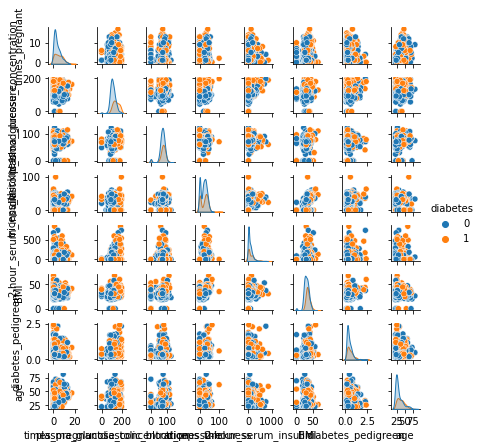

In [3]:
# pairplot gives quick overview of relationships

g = sns.pairplot(data=df, hue="diabetes", height=0.75)

In [6]:
#this has messy labela sn the data contains lots of 0s
#dropping irrelvant columns with 0s
payload_cols = ["plasma_glucose_concentration", "diastolic_blood_pressure", "triceps_thickness", "2-hour_serum_insulin", "BMI", "diabetes_pedigreen", "age"]
df["min_payload"] = df[payload_cols].min(axis=1)

In [7]:
#changing times preganat to ever pregnant to look for inserting correlations

df["ever_pregnant"] = df["times_pregnant"].apply(lambda x: 0 if x==0 else 1)

In [8]:
df_zeroes_removed = df[df["min_payload"]>0]

In [22]:
df_zeroes_replaced = df.copy()

for col in df_zeroes_replaced.columns:
    if col not in "times_pregnant diabetes":
        col_mean = df_zeroes_replaced[col].mean()
        df_zeroes_replaced[col] = df_zeroes_replaced[col].replace(0, col_mean)

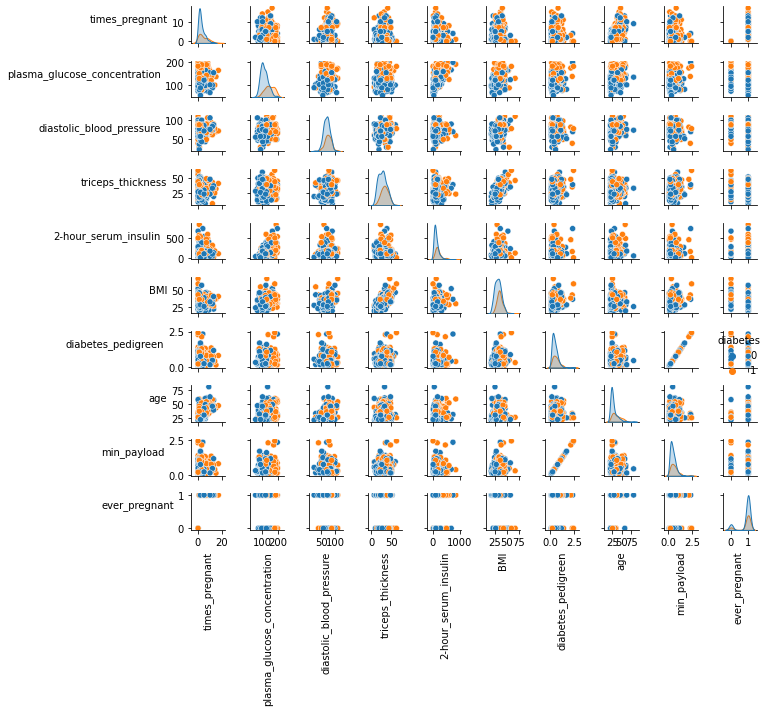

In [10]:
g = sns.pairplot(data=df_zeroes_removed, hue="diabetes", height=1)

for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.yaxis.get_label().set_horizontalalignment("right")

plt.tight_layout()
plt.show()

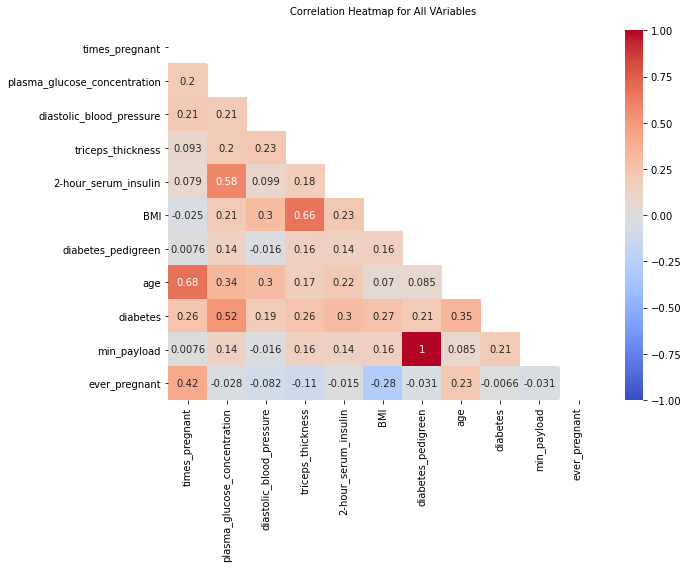

In [19]:
#difficult to see correlations, trying heatmap

corr = df_zeroes_removed.corr()
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title("Correlation Heatmap for All VAriables", fontdict={"fontsize":10}, pad=16)

plt.tight_layout()
plt.show()

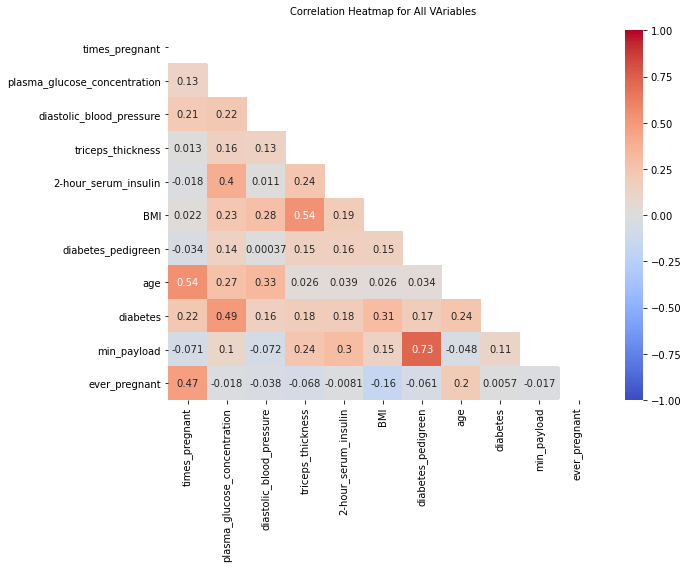

In [23]:
#checking for correlations with zeroes replaced instead of removed

corr = df_zeroes_replaced.corr()
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title("Correlation Heatmap for All VAriables", fontdict={"fontsize":10}, pad=16)

plt.tight_layout()
plt.show()

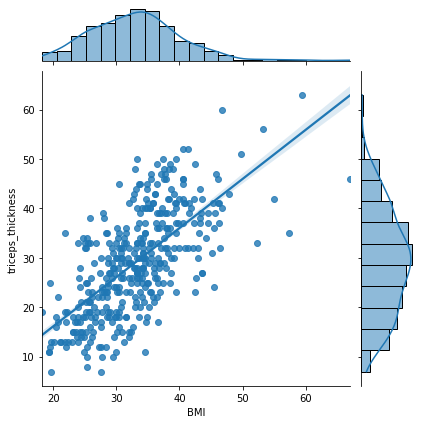

In [25]:
#same correlations stand out both when 0s are removed or replaced
#the correlation between min_payload and diabetes_predigreen is trivial
#looking in more detaul at the strongest correlation

sns.jointplot(data=df_zeroes_removed, x = "BMI", y= "triceps_thickness", kind="reg", ci=60)
None